# Multiple linear regression

## Grading the professor

Many college courses conclude by giving students the opportunity to evaluate the course and the instructor anonymously. However, the use of these student evaluations as an indicator of course quality and teaching effectiveness is often criticized because these measures may reflect the influence of non-teaching related characteristics, such as the physical appearance of the instructor. The article titled, “Beauty in the classroom: instructors’ pulchritude and putative pedagogical productivity” (Hamermesh and Parker, 2005) found that instructors who are viewed to be better looking receive higher instructional ratings. (Daniel S. Hamermesh, Amy Parker, Beauty in the classroom: instructors pulchritude and putative pedagogical productivity, _Economics of Education Review_, Volume 24, Issue 4, August 2005, Pages 369-376, ISSN 0272-7757, 10.1016/j.econedurev.2004.07.013. http://www.sciencedirect.com/science/article/pii/S0272775704001165.)

In this lab we will analyze the data from this study in order to learn what goes into a positive professor evaluation.  

## The data

The data were gathered from end of semester student evaluations for a large sample of professors from the University of Texas at Austin. In addition, six students rated the professors’ physical appearance. (This is aslightly modified version of the original data set that was released as part of the replication data for _Data Analysis Using Regression and Multilevel/Hierarchical Models_ (Gelman and Hill, 2007).) The result is a data frame where each row contains a different course and columns represent variables about the courses and professors.

In [2]:
%matplotlib inline

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

df = pd.read_csv("../datasets/evals.csv")
df.head()

,course_id,prof_id,score,rank,ethnicity,gender,language,age,cls_perc_eval,cls_did_eval,...,cls_credits,bty_f1lower,bty_f1upper,bty_f2upper,bty_m1lower,bty_m1upper,bty_m2upper,bty_avg,pic_outfit,pic_color
0,1,1,4.7,tenure track,minority,female,english,36,55.81395,24,...,multi credit,5,7,6,2,4,6,5.0,not formal,color
1,2,1,4.1,tenure track,minority,female,english,36,68.80000,86,...,multi credit,5,7,6,2,4,6,5.0,not formal,color
2,3,1,3.9,tenure track,minority,female,english,36,60.80000,76,...,multi credit,5,7,6,2,4,6,5.0,not formal,color
3,4,1,4.8,tenure track,minority,female,english,36,62.60163,77,...,multi credit,5,7,6,2,4,6,5.0,not formal,color
4,5,2,4.6,tenured,not minority,male,english,59,85.00000,17,...,multi credit,4,4,2,2,3,3,3.0,not formal,color


## Exploring the data

### Exercise 1 - Is this an observational study or an experiment? The original research question posed in the paper is whether beauty leads directly to the differences in course evaluations. Given the study design, is it possible to answer this question as it is phrased? If not, rephrase the question.

This is observational, not an experiment. If it would be an experiment, we would need to divide into two groups and see that actually beauty leads to different evaluations.

### Exercise 2 - Describe the distribution of `score`. Is the distribution skewed? What does that tell you about how students rate courses? Is this what you expected to see? Why, or why not?

It is right skewed, and since we expect course's score to be high, I assume it is normal.

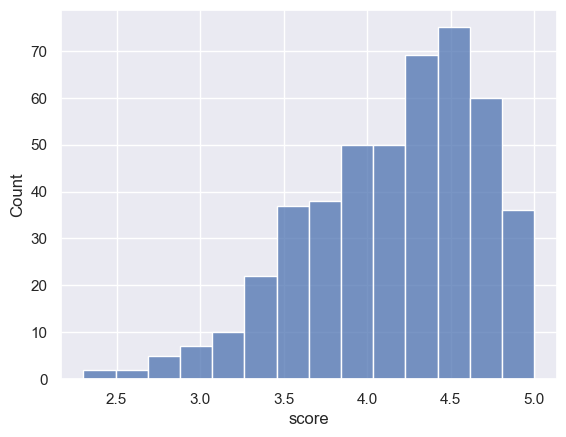

In [3]:
sns.histplot(df["score"])

plt.show()

### Exercise 3 - Excluding `score`, select two other variables and describe their relationship using an appropriate visualization (scatterplot, side-by-side boxplots, or mosaic plot).

Let's choose `age` and `beauty`.

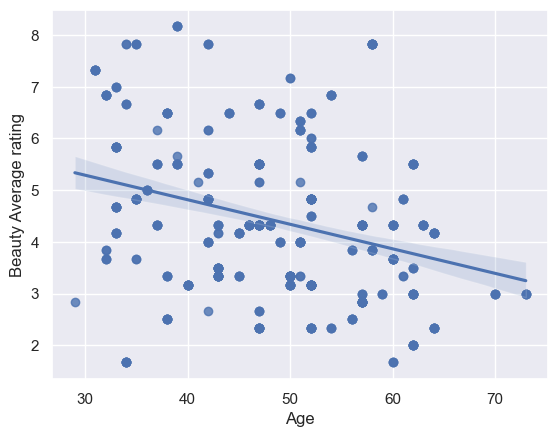

In [4]:
sns.regplot(x="age", y="bty_avg", data=df)

plt.xlabel("Age")
plt.ylabel("Beauty Average rating")

plt.show()

## Simple linear regression

The fundamental phenomenon suggested by the study is that better looking teachers are evaluated more favorably. Let's create a scatterplot to see if this appears to be the case:

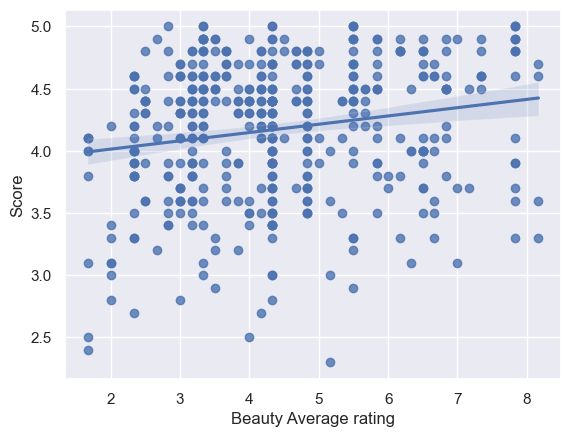

In [5]:
sns.regplot(x="bty_avg", y="score", data=df)

plt.xlabel("Beauty Average rating")
plt.ylabel("Score")

plt.show()

### Exercise 4 - Replot the scatterplot, but this time add jitter on the y- or the x-coordinate. What was misleading about the initial scatterplot?

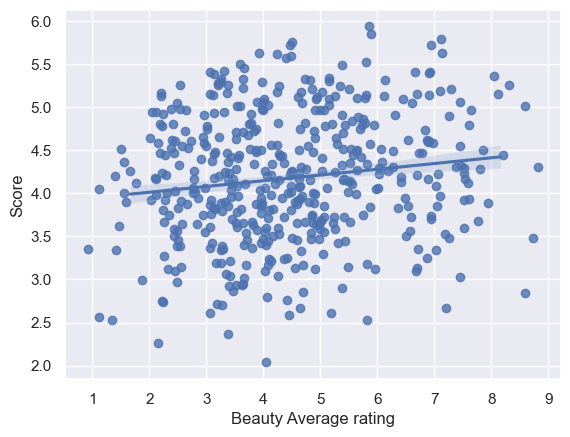

In [6]:
sns.regplot(x="bty_avg", y="score", x_jitter=1, y_jitter=1, data=df)

plt.xlabel("Beauty Average rating")
plt.ylabel("Score")

plt.show()

### Exercise 5 - Let’s see if the apparent trend in the plot is something more than natural variation. Fit a linear model called `m_bty` to predict average professor score by average beauty rating and add the line to your plot. Write out the equation for the linear model and interpret the slope. Is average beauty score a statistically significant predictor? Does it appear to be a practically significant predictor?

The regression equation is $score = 3.88 + 0.07 * bty\_avg$. The slope is 0.07. The intercept is 3.88. The slope is statistically significant according to the pvalue.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     16.73
Date:                Sun, 04 Aug 2024   Prob (F-statistic):           5.08e-05
Time:                        11:41:24   Log-Likelihood:                -366.22
No. Observations:                 463   AIC:                             736.4
Df Residuals:                     461   BIC:                             744.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.8803      0.076     50.961      0.000       3.731       4.030
bty_avg        0.0666      0.016      4.090      0.000       0.035       0.099
==============================================================================
Omnibus:                       33.007   Durbin-Watson:                   1.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.797
Skew:                          -0.709   Prob(JB):                     3.76e-09
Kurtosis:                       3.007   Cond. No.                         14.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

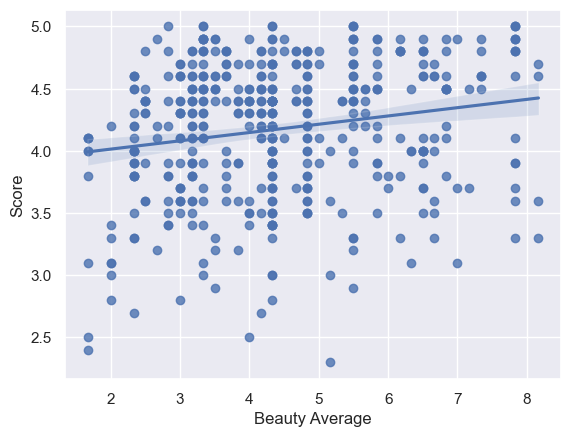

In [7]:
import statsmodels.api as sm

m_bty = sm.OLS.from_formula("score ~ bty_avg", data=df)
result_m_bty = m_bty.fit()

display(result_m_bty.summary())

sns.regplot(x="bty_avg", y="score", data=df)
plt.xlabel("Beauty Average")
plt.ylabel("Score")

plt.show()

### Exercise 6 - Use residual plots to evaluate whether the conditions of least squares regression are reasonable. Provide plots and comments for each one (see the Simple Regression Lab for a reminder of how to make these).

From the residuals plot we can see that the conditions are met.

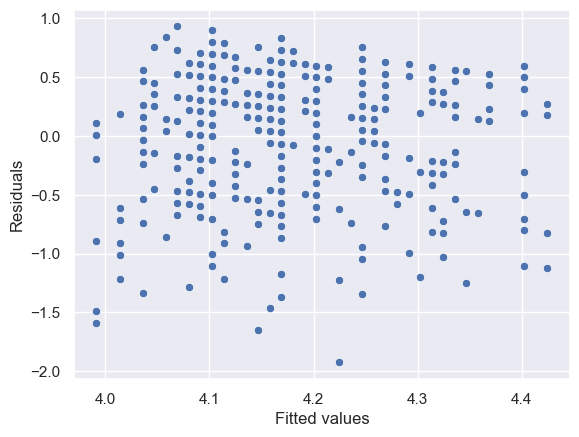

In [8]:
sns.scatterplot(x=result_m_bty.fittedvalues, y=result_m_bty.resid)

plt.xlabel("Fitted values")
plt.ylabel("Residuals")

plt.show()

## Multiple linear regression

The data set contains several variables on the beauty score of the professor: individual ratings from each of the six students who were asked to score the physical appearance of the professors and the average of these six scores. Let’s take a look at the relationship between one of these scores and the average beauty score.

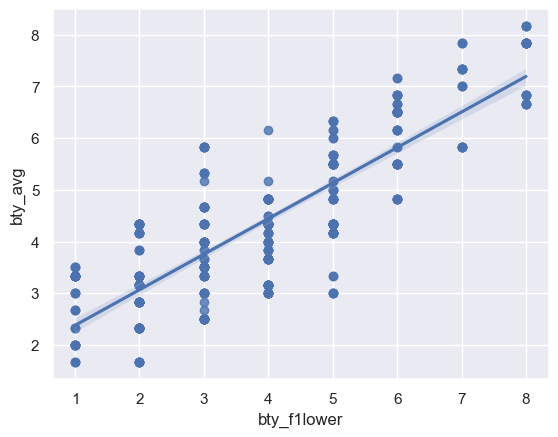

In [9]:
sns.regplot(x="bty_f1lower", y="bty_avg", data=df)

plt.show()

In [10]:
display(df[["bty_avg", "bty_f1lower"]].corr())

,bty_avg,bty_f1lower
bty_avg,1.000000,0.843911
bty_f1lower,0.843911,1.000000


As expected the relationship is quite strong - after all, the average score is calculated using the individual scores. We can actually take a look at the relationships between all beauty variables (columns 13 through 19) using the following command:

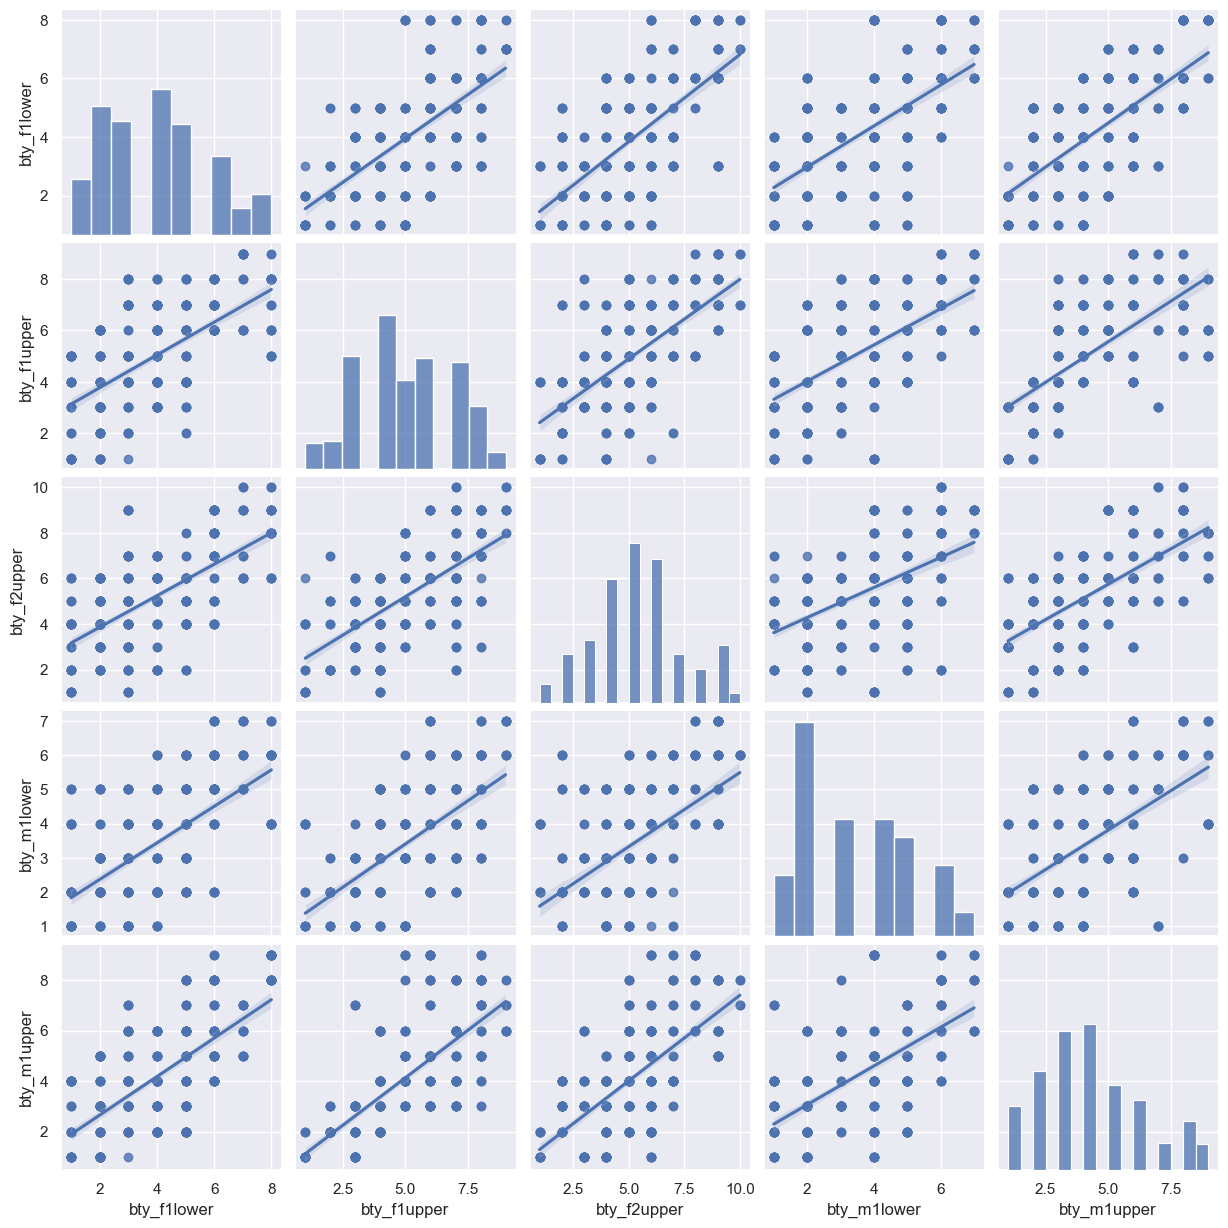

In [11]:
sns.pairplot(df.iloc[:, 12:19], kind="reg")

plt.show()

These variables are collinear (correlated), and adding more than one of these variables to the model would not add much value to the model. In this application and with these highly-correlated predictors, it is reasonable to use the average beauty score as the single representative of these variables.

In order to see if beauty is still a significant predictor of professor score after we’ve accounted for the gender of the professor, we can add the gender term into the model.

In [12]:
m_bty_gen = sm.OLS.from_formula("score ~ bty_avg + gender", data=df)
result_m_bty_gen = m_bty_gen.fit()

display(result_m_bty_gen.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     14.45
Date:                Sun, 04 Aug 2024   Prob (F-statistic):           8.18e-07
Time:                        11:41:26   Log-Likelihood:                -360.37
No. Observations:                 463   AIC:                             726.7
Df Residuals:                     460   BIC:                             739.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.7473      0.085     44.266      0.000       3.581       3.914
gender[T.male]     0.1724      0.050      3.433      0.001       0.074       0.271
bty_avg            0.0742      0.016      4.563      0.000       0.042       0.106
==============================================================================
Omnibus:                       30.145   Durbin-Watson:                   1.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.960
Skew:                          -0.672   Prob(JB):                     2.56e-08
Kurtosis:                       2.925   Cond. No.                         17.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Exercise 7 - P-values and parameter estimates should only be trusted if the conditions for the regression are reasonable. Verify that the conditions for this model are reasonable using diagnostic plots.

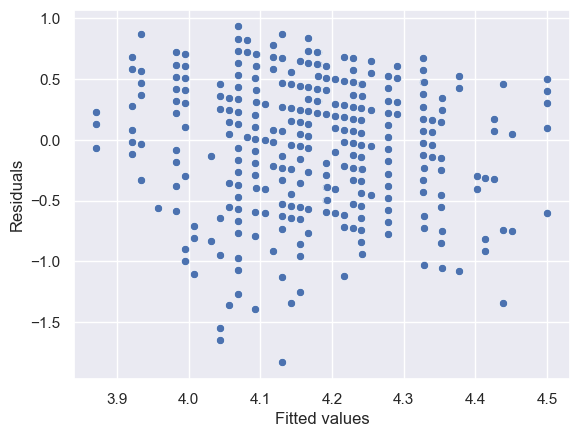

In [13]:
sns.scatterplot(x=result_m_bty_gen.fittedvalues, y=result_m_bty_gen.resid)

plt.xlabel("Fitted values")
plt.ylabel("Residuals")

plt.show()

The model seems reasonable.

### Exercise 8 - Is `bty_avg` still a significant predictor of `score`? Has the addition of `gender` to the model changed the parameter estimate for `bty_avg`?